In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import pandoc
#1. Cleaning na values form the set
df = pd.read_csv('1671752alienation_data.csv')
print(df.isna().sum())
#deleteing NA values
df.dropna(subset=['alienation', 'income'], inplace=True)
print(df.isna().sum())

alienation    2
income        6
male          0
consult       0
dtype: int64
alienation    0
income        0
male          0
consult       0
dtype: int64


In [2]:
#2.Report the descriptive statistics of alienation in your sample + 5. report for income
alienation_income = ['alienation', 'income']

for column in alienation_income:
    data = df[column]
    
    # Calculate mean, median, stdev, and range
    mean = np.mean(data)
    median = np.median(data)
    stdev = np.std(data)
    data_range = np.ptp(data) #peak to peak range
    min_value = min(data)
    max_value = max(data)
    col_length = len(data)

    print(f"Statistics for {column}:")
    print(f"Mean: {round(mean, 2)}")
    print(f"Median: {median}")
    print(f"Standard Deviation: {round(stdev, 2)}")
    print(f"Col Length: {col_length}")
    print(f"Min Value: {min_value}")
    print(f"Max Value: {round(max_value, 2)}")
    print(f"Range: {round(data_range, 2)}\n")

Statistics for alienation:
Mean: 5.56
Median: 5.0
Standard Deviation: 2.9
Col Length: 444
Min Value: 1.0
Max Value: 10.0
Range: 9.0

Statistics for income:
Mean: 59401.72
Median: 61466.53515625
Standard Deviation: 36061.47
Col Length: 444
Min Value: 0.0
Max Value: 137731.33
Range: 137731.33



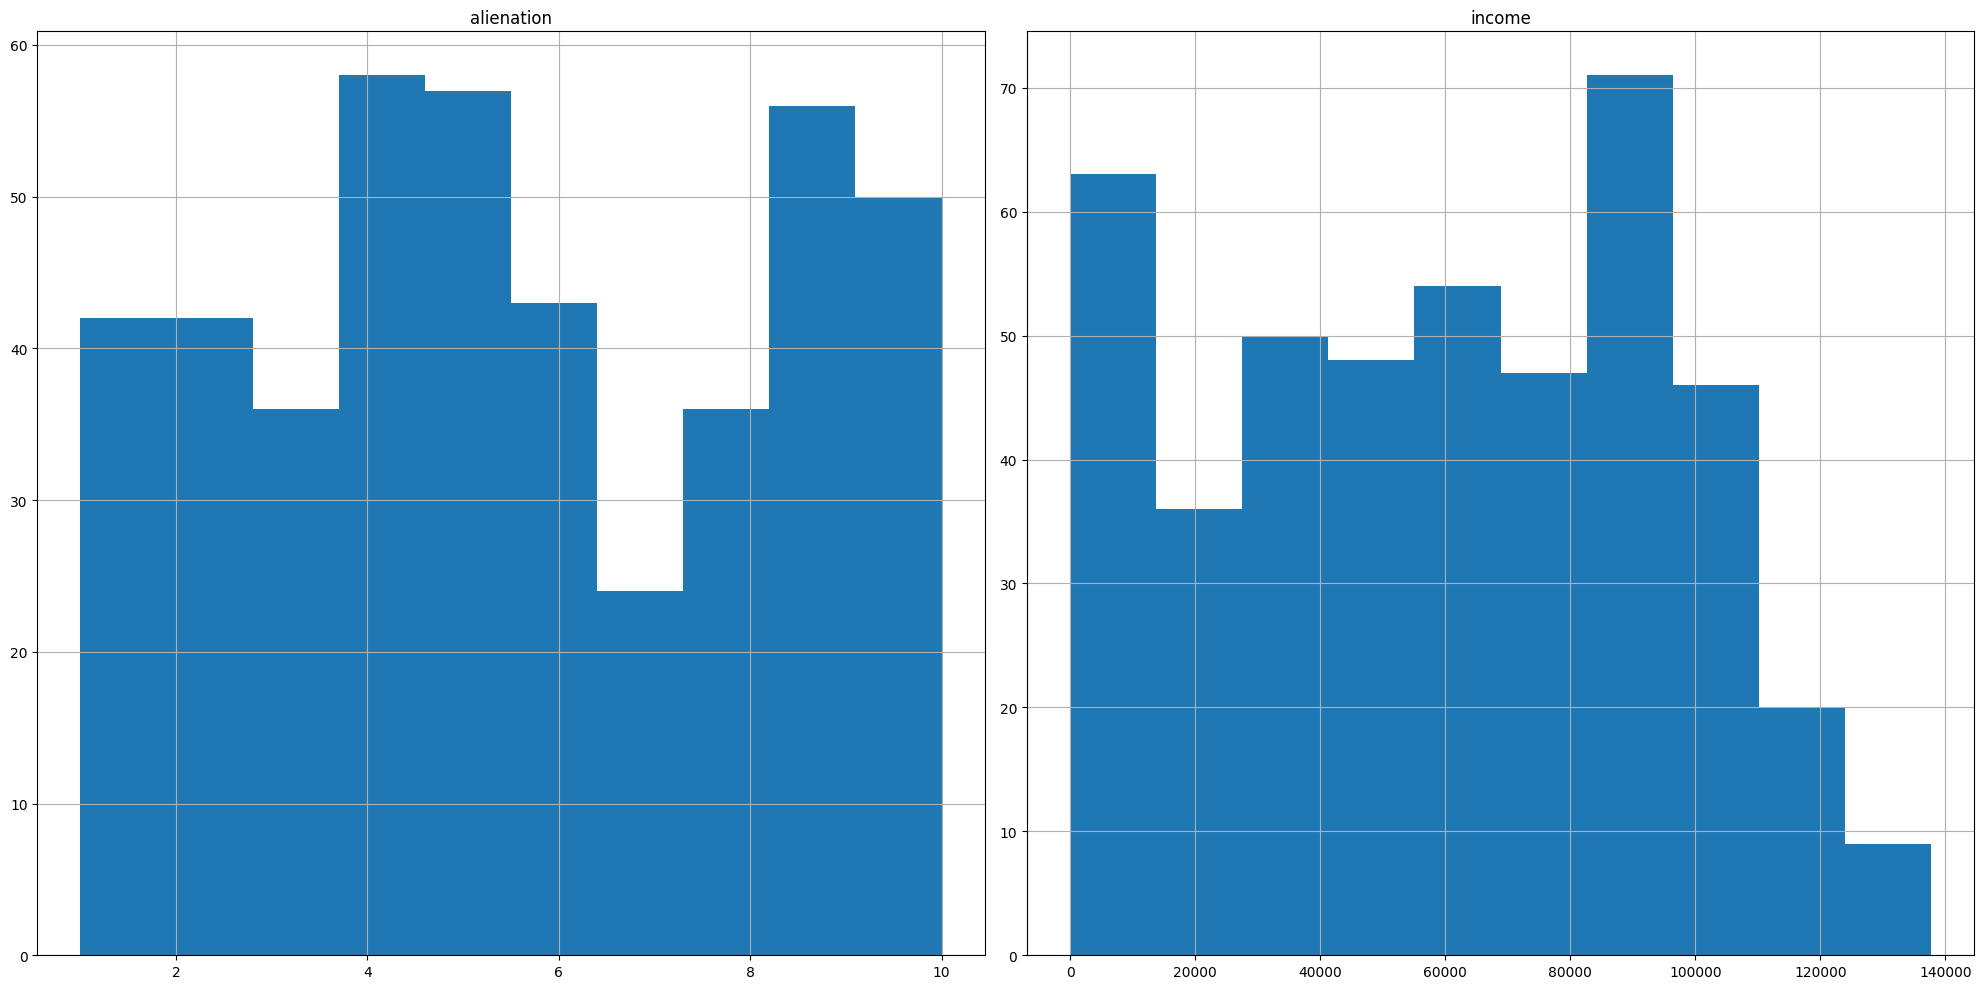

In [3]:
#3. Report on the distribution of the alienation data + 5. report for income
#3a. presenting a histogram of alienation. Based on a visual inspection, describe the distribution.
import matplotlib.pyplot as plt
plot_alienation_income = df[['alienation', 'income']]

plot_alienation_income.hist(figsize=(20,10))
plt.tight_layout()
plt.show()


In [4]:
#3b and + 5. report for income
from scipy import stats

for column in alienation_income:
    data = df[column]
    stat, p = stats.shapiro(data)
    alpha = 0.05

    print(f'Shapiro-Wilk test for column: {column}, with alpha = {alpha}')
    print(f'Test: {stat}')
    print(f'Alpha: {alpha}')
    print(f'p-value: {p}\n')

Shapiro-Wilk test for column: alienation, with alpha = 0.05
Test: 0.9297874569892883
Alpha: 0.05
p-value: 1.388938606055462e-13

Shapiro-Wilk test for column: income, with alpha = 0.05
Test: 0.9618746042251587
Alpha: 0.05
p-value: 2.536772569783352e-09



In [5]:
#4.Report 2-3 for males and females separately.
#Male market as 1, female 0

from scipy import stats

sex_female = df[df['male']== 0]
sex_male = df[df['male'] == 1]


#Calculating descriptive statistics for alienation in females
alienation_female = 'Alienation Female'
mean_female = np.mean(sex_female['alienation'])
median_female = np.median(sex_female['alienation'])
std_female = np.std(sex_female['alienation'])
range_female = np.ptp(sex_female['alienation'])
min_value_female = min(sex_female['alienation'])
max_value_female = max(sex_female['alienation'])
col_length_female = len(sex_female['alienation'])


#Calculating descriptive statistics for alienation in males
alienation_male = 'Alienation Male'
mean_male = np.mean(sex_male['alienation'])
median_male = np.median(sex_male['alienation'])
std_male = np.std(sex_male['alienation'])
range_male = np.ptp(sex_male['alienation'])
min_value_male = min(sex_male['alienation'])
max_value_male = max(sex_male['alienation'])
col_length_male = len(sex_male['alienation'])

#print for female
print(f"Statistics for {alienation_female}:")
print(f"Mean: {mean_female}")
print(f"Median: {median_female}")
print(f"Standard Deviation: {std_female}")
print(f"Col Length: {col_length_female}")
print(f"Min Value: {min_value_female}")
print(f"Max Value: {max_value_female}")
print(f"Range: {range_female}\n")

#print for male
print(f"Statistics for {alienation_male}:")
print(f"Mean: {mean_male}")
print(f"Median: {median_male}")
print(f"Standard Deviation: {std_male}")
print(f"Col Length: {col_length_male}")
print(f"Min Value: {min_value_male}")
print(f"Max Value: {max_value_male}")
print(f"Range: {range_male}\n")

Statistics for Alienation Female:
Mean: 5.579399141630901
Median: 5.0
Standard Deviation: 3.181748591967716
Col Length: 233
Min Value: 1.0
Max Value: 10.0
Range: 9.0

Statistics for Alienation Male:
Mean: 5.540284360189573
Median: 5.0
Standard Deviation: 2.5410446623409286
Col Length: 211
Min Value: 1.0
Max Value: 10.0
Range: 9.0



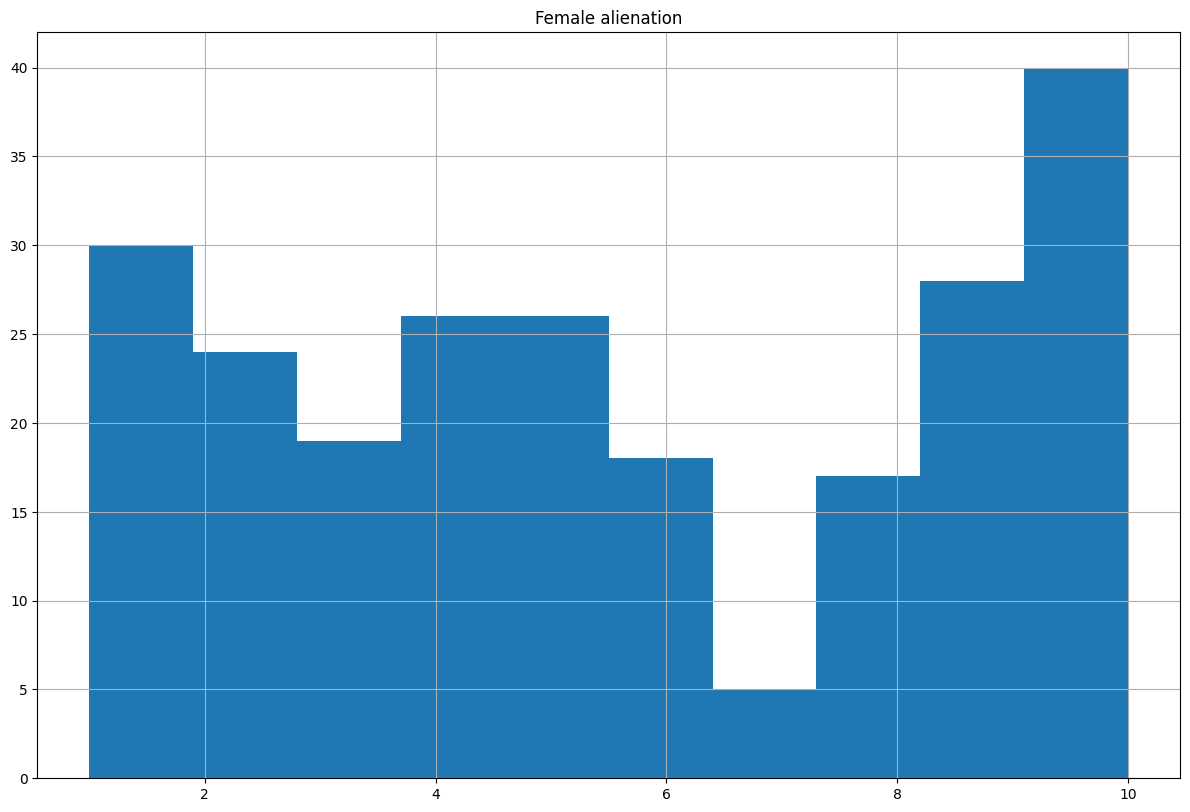

In [6]:
#a. Histogram of alienation in females
sex_female['alienation'].hist(figsize=(12,8))
plt.tight_layout()
plt.title("Female alienation")
plt.show()




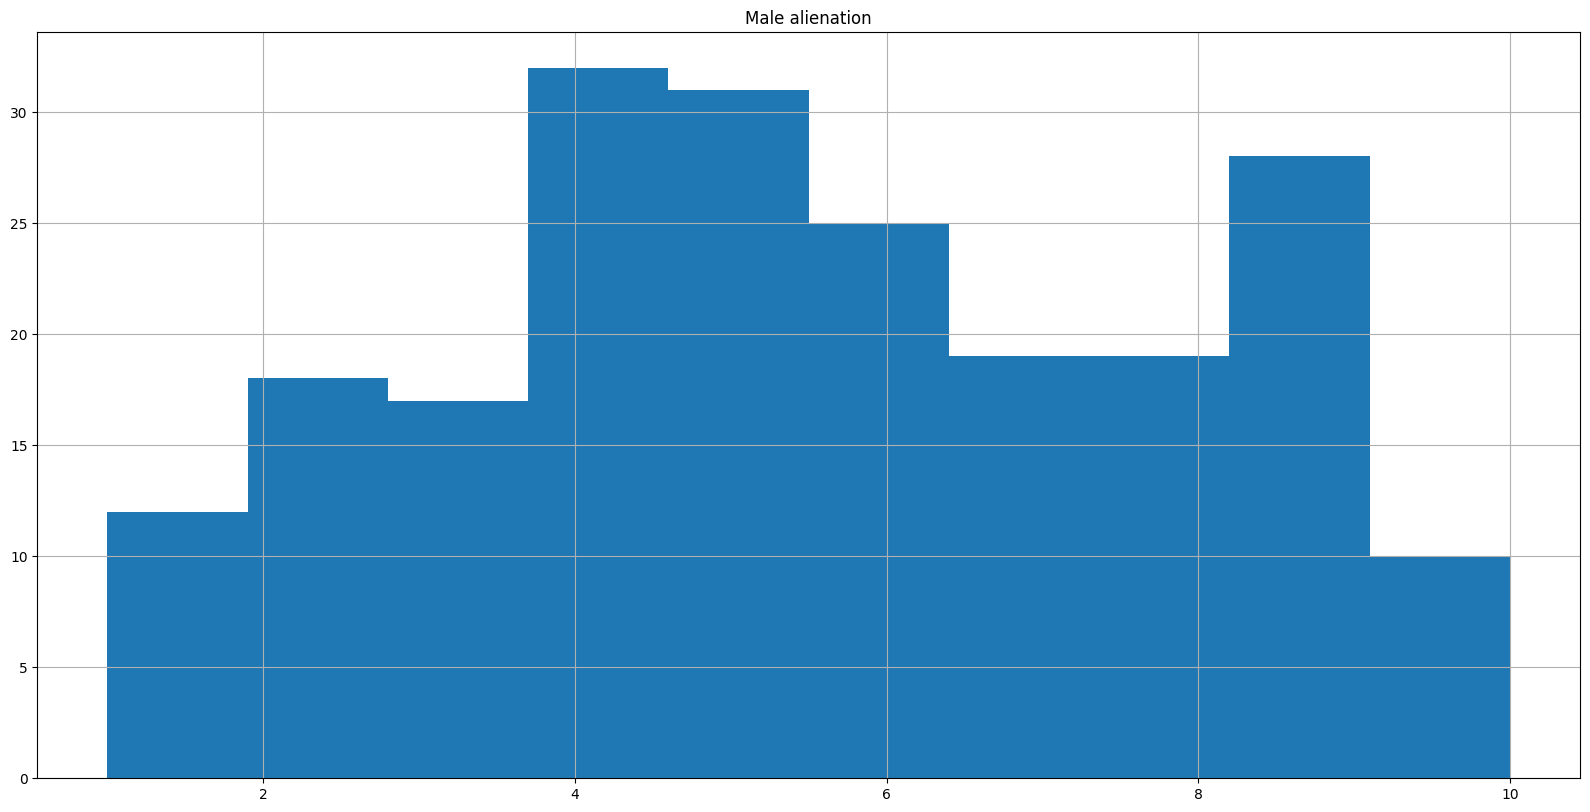

In [7]:
sex_male['alienation'].hist(figsize=(16,8))
plt.tight_layout()
plt.title('Male alienation')
plt.show()

#Based on visual inspection, seems like both tables are right skewed, which can be confirmed by mean > median, for both cases.
#Therefore, the visual form of male alienation looks even closer to the normal distribution, which reminds bell shape.

In [8]:
#Shapiro - Wilk for female and male alianation
#Female
def shapiro_test(data_column, group):
    stat, p = stats.shapiro(data_column)
    alpha = 0.05

    if group == 'sex_female':
        gender = 'female'
    elif group == 'sex_male':
        gender = 'male'
    else:
        gender = ''
    
    print(f'Shapiro-Wilk test for column: in {gender} {column} , with alpha = {alpha}')
    print(f'Test: {stat}')
    print(f'Alpha: {alpha}')
    print(f'p-value: {format(np.sqrt(p))}\n')


shapiro_test(sex_female['alienation'], 'sex_female')
shapiro_test(sex_male['alienation'], 'sex_male')


Shapiro-Wilk test for column: in female income , with alpha = 0.05
Test: 0.8976131677627563
Alpha: 0.05
p-value: 4.09462576409503e-06

Shapiro-Wilk test for column: in male income , with alpha = 0.05
Test: 0.9529457688331604
Alpha: 0.05
p-value: 0.0014410908032246733



In [9]:
#6. Report for income questions 2-3

income = ['income']

for column in income:
    data = df[column]
    
    # Calculate mean, median, stdev, and range
    mean = np.mean(data)
    median = np.median(data)
    stdev = np.std(data)
    data_range = np.ptp(data) #peak to peak range
    min_value = min(data)
    max_value = max(data)
    col_length = len(data)

    print(f"Statistics for {column}:")
    print(f"Mean: {mean}")
    print(f"Median: {median}")
    print(f"Standard Deviation: {stdev}")
    print(f"Col Length: {col_length}")
    print(f"Min Value: {min_value}")
    print(f"Max Value: {max_value}")
    print(f"Range: {data_range}\n")
#Median > Mean, we can assume that the distribution is left skewed. 


Statistics for income:
Mean: 59401.72389317418
Median: 61466.53515625
Standard Deviation: 36061.466056410434
Col Length: 444
Min Value: 0.0
Max Value: 137731.328125
Range: 137731.328125



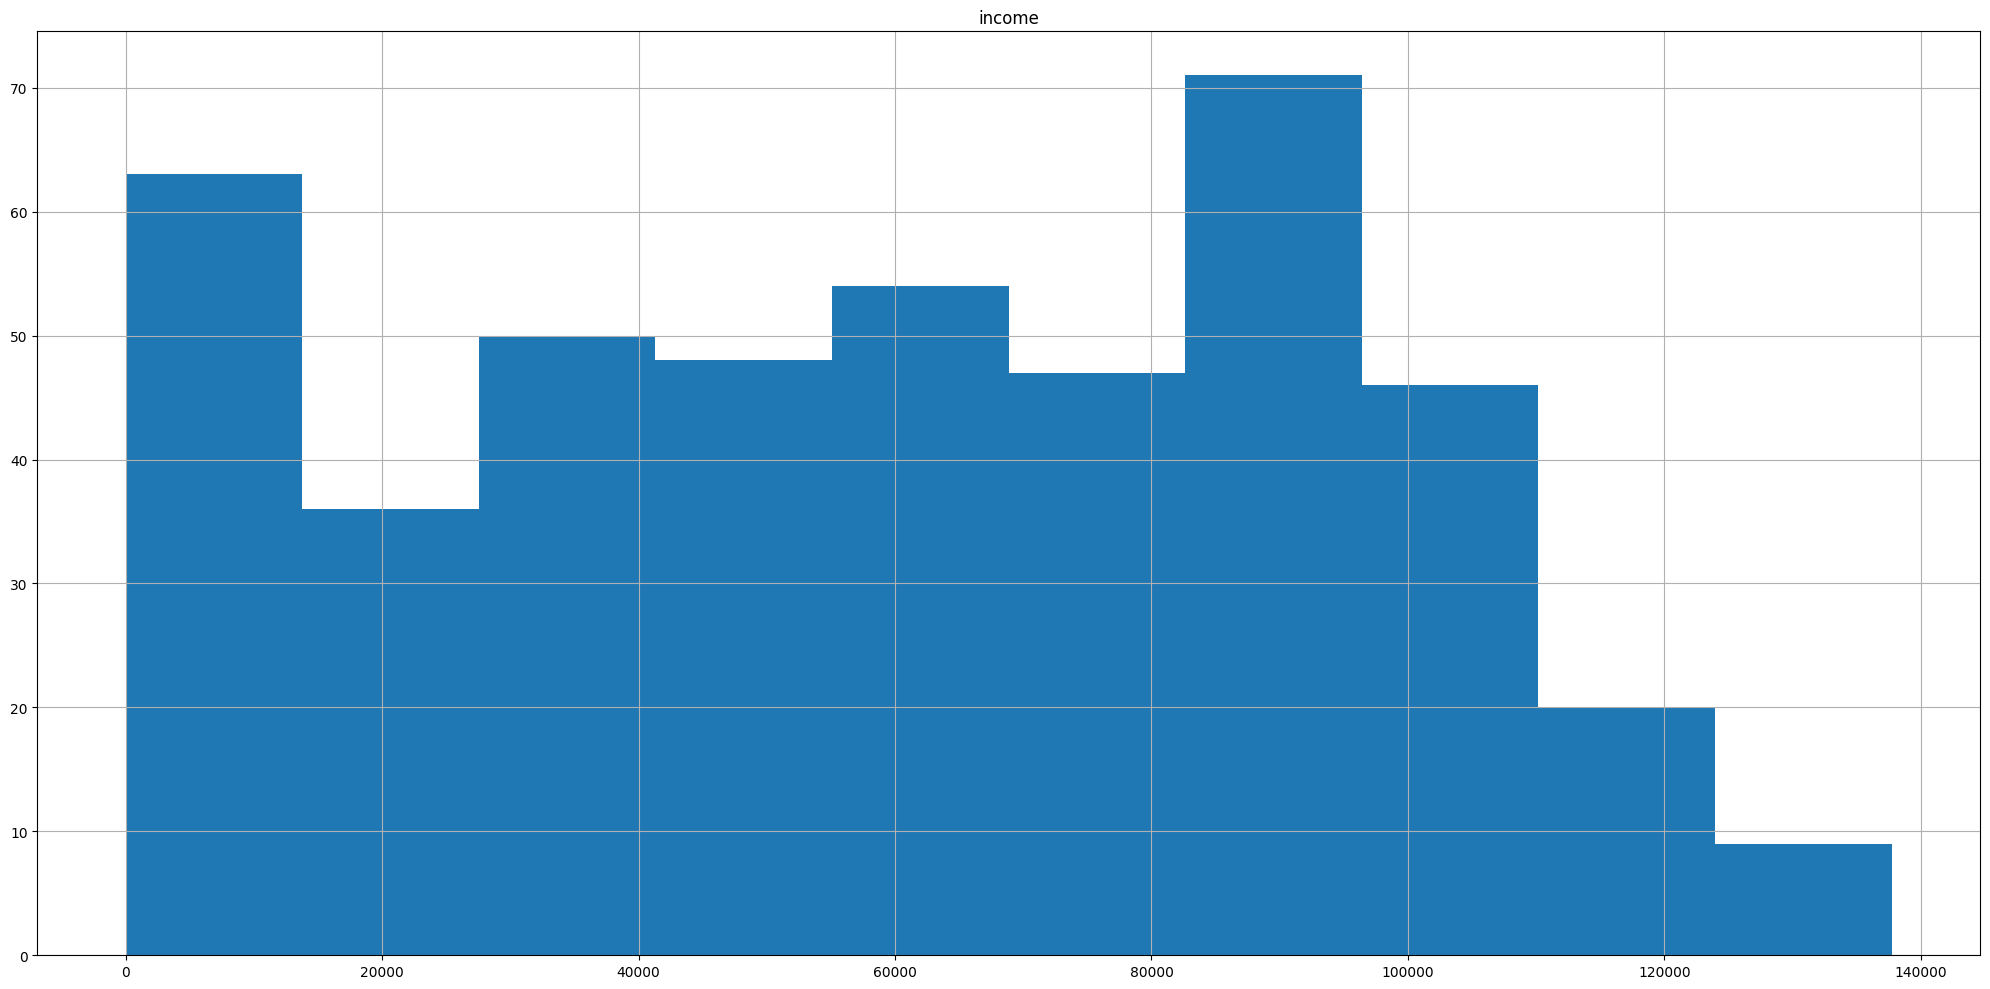

In [10]:
plot_income = df[['income']]

plot_income.hist(figsize=(20,10))
plt.tight_layout()
plt.show()
#from visual inspection, the data looks left skewed, and that confirm the previous assumption, since the median > mean, which says that 
#the distribution supposed to be left skewed

In [11]:
#Shapiro wilk test for income

shapiro_test(df['income'], 'income')

#income is normally distributed as well, however, according to CLT, we assume that when sample > 30, we state the data is normally distributed.

Shapiro-Wilk test for column: in  income , with alpha = 0.05
Test: 0.9618746042251587
Alpha: 0.05
p-value: 5.0366383330385675e-05



In [12]:
#6a. Report females and males who did seek for help and who didnt

male_help = df[(df['male'] == 1) & (df['consult'] == 1)].shape[0]
male_no_help = df[(df['male'] == 1) & (df['consult'] == 0)].shape[0]

female_help = df[(df['male'] == 0) & (df['consult'] == 1)].shape[0]
female_no_help = df[(df['male'] == 0) & (df['consult'] == 0)].shape[0]

result_data = pd.DataFrame({
    'Gender': ['Male', 'Female'],
    'Looked for help': [male_help, female_help],
    "Didn't look for help": [male_no_help, female_no_help]
})

print(result_data)

   Gender  Looked for help  Didn't look for help
0    Male                8                   203
1  Female               28                   205


In [13]:
#6.b
# Calculate the proportion of people seeking psychological help
proportion_help = df['consult'].sum() / len(df)

# Determine the likelihood
likelihood = 1 if proportion_help <= 0.1 else 0

# Display the proportion of people seeking psychological help and likelihood
print("Proportion of people seeking help:", proportion_help)
print("Likelihood of at most 10 percent seeking help:", likelihood)

Proportion of people seeking help: 0.08108108108108109
Likelihood of at most 10 percent seeking help: 1


In [14]:
#6c.

probability_male = df['male'].sum() / len(df)
probability_help = proportion_help
double_counting = probability_male * probability_help
probability = probability_male + probability_help - double_counting

print(f'The probability of being a male and sought for help is: {probability_male.round(4)} + {probability_help.round(4)} - {double_counting.round(4)} = {probability.round(4)}')

The probability of being a male and sought for help is: 0.4752 + 0.0811 - 0.0385 = 0.5178


In [15]:
#6d.

female_help_in_total_help = female_help / (male_help + female_help)
print(f'A person who sought psychological help, this person actually is a female is {round(female_help_in_total_help, 4)}')

A person who sought psychological help, this person actually is a female is 0.7778


In [16]:
#7a.
import requests
base_currency = 'USD'
target_currency = 'EUR'
url = f'https://api.frankfurter.app/latest?from={base_currency}&to={target_currency}'

response = requests.get(url)
data = response.json()
conversion_rate = data['rates'][target_currency]

#functions to display in USD and in EUR
def mean_stdev_USD(income_USD):
     mean = np.mean(income_USD)
     stdev = np.std(income_USD)
     print(f'Income mean is; {mean} {base_currency} and stdev is: {stdev} {base_currency}')

def mean_stdev_EUR(income_EUR):
     mean = np.mean(income_EUR)*conversion_rate
     stdev = np.std(income_EUR)*conversion_rate
     print(f'Income mean is: {mean} {target_currency} and stdev is: {stdev} {target_currency}')


print(f'The conversion rate is: {conversion_rate} USD to 1 EUR')
mean_stdev_USD(df['income'])
mean_stdev_EUR(df['income'])





The conversion rate is: 0.93101 USD to 1 EUR
Income mean is; 59401.72389317418 USD and stdev is: 36061.466056410434 USD
Income mean is: 55303.5989617841 EUR and stdev is: 33573.58551317868 EUR


In [17]:
#7b.
#In summary, the provided outcomes suggest that centered income variable effectively removes 
#the sample mean effect, making the mean of the centered variable close to zero while retaining 
#the same variability as the original income data. This centered variable can be useful for 
#various statistical analyses and modeling where the mean effect needs to be eliminated for better 
#interpretation and comparison.

sample_mean = np.mean(df['income'])
df['centered_income'] = df['income'] - sample_mean

mean_centered_income = np.mean(df['centered_income'])
stdev_centered_income = np.std(df['centered_income'])

print(f'Mean of centered income is: {mean_centered_income}, and stdev of centered income is: {stdev_centered_income}')

Mean of centered income is: 6.554916769534618e-13, and stdev of centered income is: 36061.466056410434


In [18]:
#calculate the mean income separately for males and females
mean_income_male = np.mean(df[df['male'] == 1]['income'])
mean_income_female = np.mean(df[df['male'] == 0]['income'])

#create centered income variables for males and females
df['centered_income_male'] = df[df['male'] == 1]['income'] - mean_income_male
df['centered_income_female'] = df[df['male'] == 0]['income'] - mean_income_female

#calculate the mean and standard deviation of centered income for each group
mean_centered_income_male = df['centered_income_male'].mean()
mean_centered_income_female = df['centered_income_female'].mean()

stdev_centered_income_male = df['centered_income_male'].std()
stdev_centered_income_female = df['centered_income_female'].std()

print(f'Mean of centered income for males is: {mean_centered_income_male}, and stdev of centered income for males is: {round(stdev_centered_income_male, 2)}')
print(f'Mean of centered income for females is: {mean_centered_income_female}, and stdev of centered income for females is: {round(stdev_centered_income_female, 2)}')

Mean of centered income for males is: 5.517313830660418e-13, and stdev of centered income for males is: 32598.57
Mean of centered income for females is: -3.1227285897782945e-12, and stdev of centered income for females is: 39038.55


In [19]:
#7c.
#To analyze the relationship between income and gender, we can use a t-test. 

#H0 there is no difference in the mean income of men and women
#H1 there is a significant difference in the mean income of men and women
#significance level of 0.05

income_male = df[df['male'] == 1]['income']
income_female = df[df['male'] == 0]['income']

t_stat, p_values = stats.ttest_ind(income_male, income_female)
alpha = 0.05

if p_values < alpha:
    print("Reject the null hypothesis")
    print("There is a significant difference in the mean income score between males and females.")
else:
    print("Fail to reject the null hypothesis")
    print("There is no significant difference in the mean income score between males and females.")

# Print the t-statistic and p-value
print(f"t-statistic: {t_stat}")
print(f"P-value: {p_values}")

Fail to reject the null hypothesis
There is no significant difference in the mean income score between males and females.
t-statistic: 0.7115666374613642
P-value: 0.47710853979135315


In [20]:
#8. 
#The null hypothesis (H0) is that there is no difference in the mean alienation of men and women. 
#The alternative hypothesis (H1) is that there is a difference in the mean alienation of men and women.
income_male = df[df['male'] == 1]['alienation']
income_female = df[df['male'] == 0]['alienation']

t_stat, p_values = stats.ttest_ind(income_male, income_female)
alpha = 0.05

if p_values < alpha:
    print("Reject the null hypothesis")
    print("There is a significant difference in the alienation score between males and females.")
else:
    print("Fail to reject the null hypothesis")
    print("There is no significant difference in the alienation score between males and females.")

# Print the t-statistic and p-value
print(f"t-statistic: {t_stat}")
print(f"P-value: {p_values}")

Fail to reject the null hypothesis
There is no significant difference in the alienation score between males and females.
t-statistic: -0.14185312217544707
P-value: 0.8872606558877842
